## Data Science Capstone Project

This notebook will be mainly used for IBM Data Science Capstone project

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Downloading Data and creatinf initial Dataset

In [2]:
# Downloading dataset from Google Drive
!wget -O Data-Collisions.csv 'https://drive.google.com/uc?export=download&id=1Y3X4xYrUVtkhTRD6wQZ5aDtf1CgzKWVO'

--2020-09-25 01:53:39--  https://drive.google.com/uc?export=download&id=1Y3X4xYrUVtkhTRD6wQZ5aDtf1CgzKWVO
Resolving drive.google.com (drive.google.com)... 172.217.1.238, 2607:f8b0:4000:803::200e
Connecting to drive.google.com (drive.google.com)|172.217.1.238|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j20d6a50sl1jaip5kfnehis5jci5dg94/1600998750000/18116944513271652786/*/1Y3X4xYrUVtkhTRD6wQZ5aDtf1CgzKWVO?e=download [following]
--2020-09-25 01:53:43--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j20d6a50sl1jaip5kfnehis5jci5dg94/1600998750000/18116944513271652786/*/1Y3X4xYrUVtkhTRD6wQZ5aDtf1CgzKWVO?e=download
Resolving doc-10-10-docs.googleusercontent.com (doc-10-10-docs.googleusercontent.com)... 172.217.9.1, 2607:f8b0:4000:806::2001
Connecting to doc-10-10-docs.googleusercontent.com (doc-10-10-docs.googl

In [3]:
#Reading initial dataset
initial_df = pd.read_csv('Data-Collisions.csv')
initial_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Cleaning Data - removing all non-relevant records

In [4]:
# First - remove all empty rows, if any
initial_df = initial_df.dropna(how = 'all')

# Remove all duplicates
initial_df.drop_duplicates()

# Replacing all NaN values by 0
initial_df = initial_df.fillna(0)

# Removing all non-vehicle cases
initial_df.drop(initial_df[initial_df['VEHCOUNT'] < 1].index, inplace = True)

initial_df = initial_df.drop(initial_df[(initial_df['SDOT_COLCODE'] == 2) | (initial_df['SDOT_COLCODE'] > 29)].index)
initial_df = initial_df.drop(initial_df[(initial_df['SDOT_COLCODE'] > 4) & (initial_df['SDOT_COLCODE'] < 10)].index)

# Removing all cases with one parked vehicle
initial_df = initial_df.drop(initial_df[(initial_df['VEHCOUNT'] == 1) & (initial_df['HITPARKEDCAR'] == 'Y')].index)

# Removing all cases related to driver influence (not related to Weather)
initial_df = initial_df.drop(initial_df[(initial_df['UNDERINFL'] == 1) | (initial_df['UNDERINFL']== 'Y')].index)
initial_df = initial_df.drop(initial_df[(initial_df['INATTENTIONIND'] == 1) | (initial_df['INATTENTIONIND']== 'Y')].index)
initial_df = initial_df.drop(initial_df[(initial_df['SPEEDING'] == 1) | (initial_df['SPEEDING']== 'Y')].index)

initial_df.shape

(145501, 38)

In [5]:
# Remove all unnecessary columns
initial_df = initial_df.drop(['X',
                              'Y',
                              'INCKEY',
                              'COLDETKEY',
                              'REPORTNO',
                              'STATUS',
                              'INTKEY',
                              'LOCATION',
                              'PEDROWNOTGRNT',
                              'SDOTCOLNUM',
                              'SEGLANEKEY',
                              'CROSSWALKKEY',
                              'EXCEPTRSNCODE',
                              'EXCEPTRSNDESC',
                              'SEVERITYDESC',
                              'SEVERITYCODE.1',
                              'ST_COLDESC',
                              'SDOT_COLDESC',
                              'INCDATE',
                              'ST_COLCODE',
                              'JUNCTIONTYPE',
                              'COLLISIONTYPE',
                              'INATTENTIONIND',
                              'SPEEDING',
                              'UNDERINFL',
                              'VEHCOUNT',
                              'PEDCYLCOUNT',
                              'PEDCOUNT',
                              'PERSONCOUNT',
                              'ADDRTYPE',
                              'OBJECTID',
                              'HITPARKEDCAR',
                              'SDOT_COLCODE'], 1)

initial_df.head()

,SEVERITYCODE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,1,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,1,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight
3,1,3/29/2013 9:26:00 AM,Clear,Dry,Daylight
4,2,1/28/2004 8:04:00 AM,Raining,Wet,Daylight


## Data Analysis
Let's look at the incidents per hour  
For that purpose we will change Date and Time of incidents to Hour of the day only and also will update AM / PM to 24 hours.

In [6]:
# Removing Date and moving to 24 hours
initial_df['INCDTTM'] = initial_df.INCDTTM.str.split(' ')

def change_time(column):
    if isinstance(column, list) and len(column) == 3:
        time = column[1].split(':')[0]
        if column[2] == 'PM':
            time = str(int(time) + 12)
        column = time
    if isinstance(column, list) and len(column) < 3:
        column = str(25)
    return int(column)

initial_df['INCDTTM'] = initial_df['INCDTTM'].apply(lambda x: change_time(x))

# Let's look at the updated dataset
initial_df.head()

,SEVERITYCODE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,14,Overcast,Wet,Daylight
1,1,18,Raining,Wet,Dark - Street Lights On
2,1,10,Overcast,Dry,Daylight
3,1,9,Clear,Dry,Daylight
4,2,8,Raining,Wet,Daylight


### Let's look at the average hours of incidents per day

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b03a96c50>]],
      dtype=object)

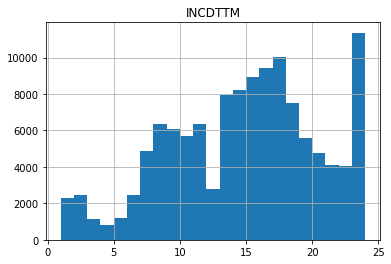

In [8]:
# Let's look at the time of incidents per day
timeoftheday_df = initial_df
timeoftheday_df.drop(timeoftheday_df[timeoftheday_df['INCDTTM'] == 25].index, inplace = True)
timeoftheday_df.hist(column='INCDTTM', bins=23)

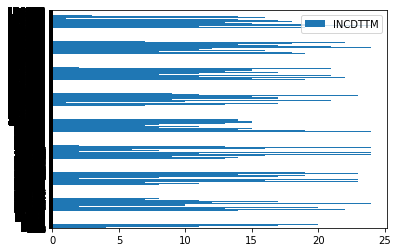

In [8]:
hist_df = timeoftheday_df[['INCDTTM', 'WEATHER']]
# hist_df = timeoftheday_df[timeoftheday_df['INCDTTM', 'WEATHER']]
# hist_df.head()
# ax = hist_df.plot.hist(by='Overcast', bins=24, alpha=0.5)

ax = hist_df.plot.barh()


In [ ]:
hist_df = timeoftheday_df[['WEATHER', 'INCDTTM']]
# hist_df = timeoftheday_df[timeoftheday_df['INCDTTM', 'WEATHER']]
# hist_df.head()
# ax = hist_df.plot.hist(by='Overcast', bins=24, alpha=0.5)

ax9 = hist_df.plot(kind='bar')

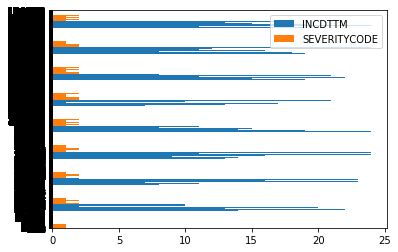

In [8]:
test_df = timeoftheday_df[['INCDTTM', 'WEATHER', 'SEVERITYCODE']]
ax1 = test_df.plot.barh()

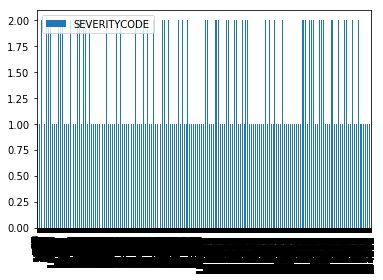

In [10]:
hist_2_df = timeoftheday_df[['SEVERITYCODE', 'WEATHER']]
ax2 = hist_2_df.plot.bar()

In [ ]:
hist_3_df = timeoftheday_df[['SEVERITYCODE', 'ROADCOND']]
ax3 = hist_3_df.plot.bar()

In [ ]:
hist_4_df = timeoftheday_df[['SEVERITYCODE', 'LIGHTCOND']]
ax4 = hist_4_df.plot.barh()

In [9]:
timeoftheday_df.WEATHER.value_counts()

Clear                       72148
Raining                     20780
Overcast                    17614
Unknown                     12048
Other                         593
Snowing                       562
Fog/Smog/Smoke                364
0                             144
Sleet/Hail/Freezing Rain       66
Blowing Sand/Dirt              40
Severe Crosswind               20
Partly Cloudy                   5
Name: WEATHER, dtype: int64

In [10]:
timeoftheday_df.ROADCOND.value_counts()

Dry               80919
Wet               29791
Unknown           12038
Ice                 699
Snow/Slush          614
0                   102
Other                78
Sand/Mud/Dirt        48
Standing Water       48
Oil                  47
Name: ROADCOND, dtype: int64

In [11]:
timeoftheday_df.LIGHTCOND.value_counts()

Daylight                    76072
Dark - Street Lights On     30053
Unknown                     10759
Dusk                         3820
Dawn                         1567
Dark - No Street Lights       994
Dark - Street Lights Off      735
0                             215
Other                         159
Dark - Unknown Lighting        10
Name: LIGHTCOND, dtype: int64

In [29]:
unknown_df = timeoftheday_df
unknown_df.drop(unknown_df[unknown_df['WEATHER'] == 'Unknown'].index, inplace = True)
unknown_df.drop(unknown_df[unknown_df['WEATHER'] == 0].index, inplace = True)
unknown_df.drop(unknown_df[unknown_df['ROADCOND'] == 'Unknown'].index, inplace = True)
unknown_df.drop(unknown_df[unknown_df['ROADCOND'] == 0].index, inplace = True)
unknown_df.drop(unknown_df[unknown_df['LIGHTCOND'] == 'Unknown'].index, inplace = True)
unknown_df.drop(unknown_df[unknown_df['LIGHTCOND'] == 0].index, inplace = True)
unknown_df.WEATHER.value_counts()


Clear                       70567
Raining                     20481
Overcast                    17109
Snowing                       503
Fog/Smog/Smoke                353
Other                         167
Sleet/Hail/Freezing Rain       64
Blowing Sand/Dirt              31
Severe Crosswind               20
Partly Cloudy                   5
Name: WEATHER, dtype: int64

In [30]:
unknown_df.ROADCOND.value_counts()

Dry               78937
Wet               29067
Ice                 611
Snow/Slush          492
Other                61
Oil                  46
Sand/Mud/Dirt        44
Standing Water       42
Name: ROADCOND, dtype: int64

In [31]:
unknown_df.LIGHTCOND.value_counts()

Daylight                    73557
Dark - Street Lights On     28858
Dusk                         3648
Dawn                         1511
Dark - No Street Lights       908
Dark - Street Lights Off      675
Other                         135
Dark - Unknown Lighting         8
Name: LIGHTCOND, dtype: int64

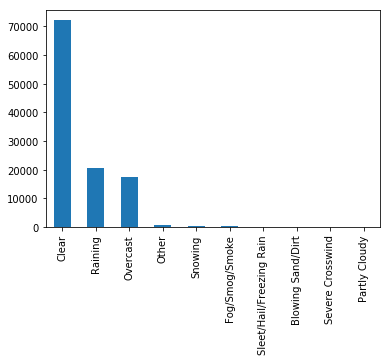

In [26]:
# timeoftheday_df.WEATHER.value_counts().plot(kind='bar')
unknown_df.WEATHER.value_counts().plot(kind='bar')

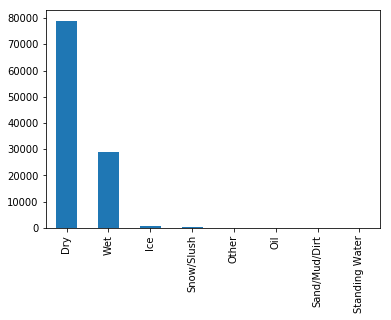

In [33]:
timeoftheday_df.ROADCOND.value_counts().plot(kind='bar')

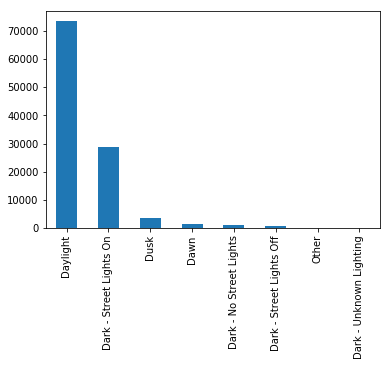

In [34]:
timeoftheday_df.LIGHTCOND.value_counts().plot(kind='bar')

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


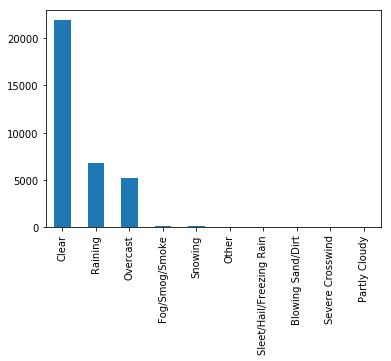

In [48]:
super_1_df = unknown_df[['SEVERITYCODE', 'WEATHER']]
super_1_df.drop(super_1_df[super_1_df['SEVERITYCODE'] == 1].index, inplace = True)
super_1_df.WEATHER.value_counts().plot(kind='bar')

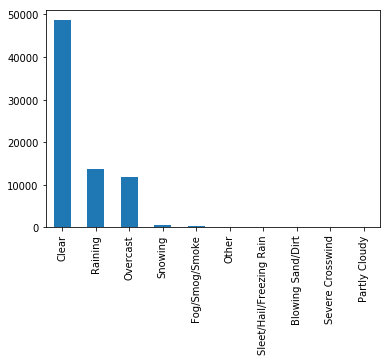

In [49]:
super_2_df = unknown_df[['SEVERITYCODE', 'WEATHER']]
super_2_df.drop(super_2_df[super_2_df['SEVERITYCODE'] == 2].index, inplace = True)
super_2_df.WEATHER.value_counts().plot(kind='bar')

In [ ]:
super_3_df = unknown_df[['SEVERITYCODE', 'WEATHER']]
super_3_df.drop(super_3_df[super_3_df['WEATHER'] != 'Raining'].index, inplace = True)
print('Severity Code for Raining weather conditions')
super_3_df.SEVERITYCODE.value_counts().plot(kind='bar')

In [ ]:
super_4_df = unknown_df[['LIGHTCOND', 'WEATHER']]
super_4_df.drop(super_4_df[super_4_df['WEATHER'] != 'Raining'].index, inplace = True)
print('Severity Code for Raining weather conditions')
super_4_df.LIGHTCOND.value_counts().plot(kind='bar')

In [ ]:
super_5_df = unknown_df[['ROADCOND', 'WEATHER']]
super_5_df.drop(super_5_df[super_5_df['WEATHER'] != 'Raining'].index, inplace = True)
print('Severity Code for Raining weather conditions')
super_5_df.ROADCOND.value_counts().plot(kind='bar')

In [ ]:
unknown_df.shape

The incidents for  Clear outside weather conditions, hourly:
The incidents for  Raining outside weather conditions, hourly:
The incidents for  Overcast outside weather conditions, hourly:
The incidents for  Unknown outside weather conditions, hourly:
The incidents for  Other outside weather conditions, hourly:
The incidents for  Snowing outside weather conditions, hourly:
The incidents for  Fog/Smog/Smoke outside weather conditions, hourly:
The incidents for  Sleet/Hail/Freezing Rain outside weather conditions, hourly:
The incidents for  Blowing Sand/Dirt outside weather conditions, hourly:
The incidents for  Severe Crosswind outside weather conditions, hourly:
The incidents for  Partly Cloudy outside weather conditions, hourly:


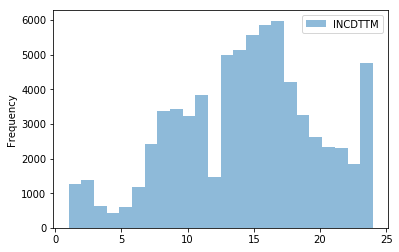

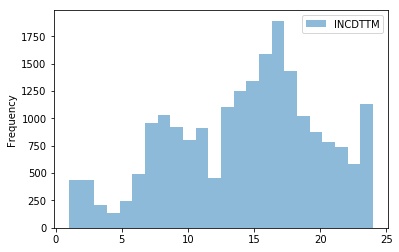

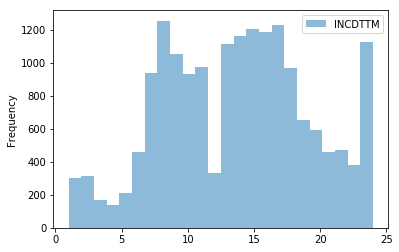

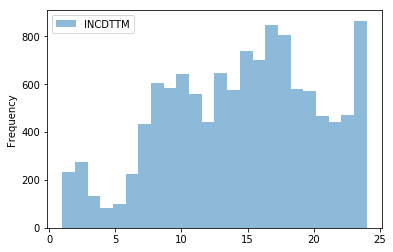

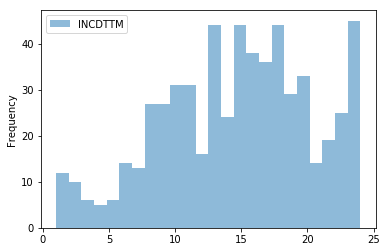

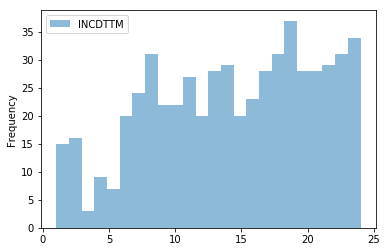

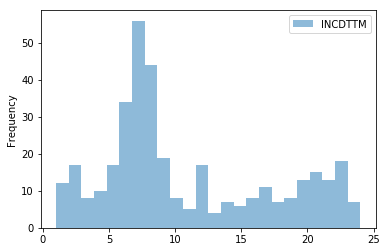

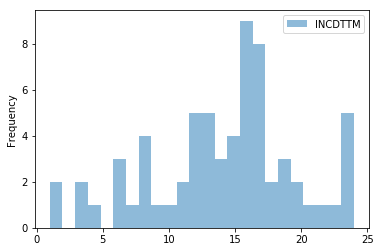

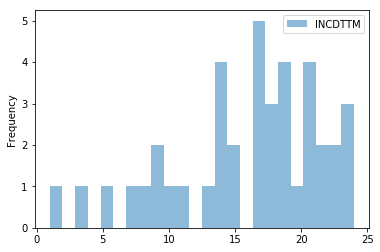

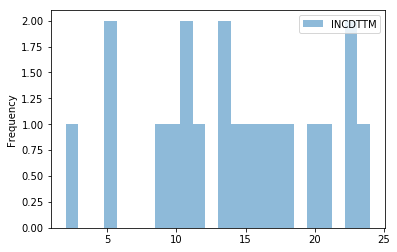

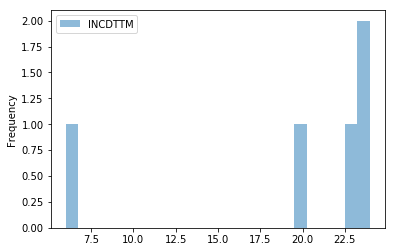

In [9]:

timeoftheday_weather_df = timeoftheday_df[['INCDTTM', 'WEATHER']]

for weather in ['Clear', 'Raining', 'Overcast', 'Unknown', 'Other', 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy']:
    timeoftheday_overcast_df = timeoftheday_weather_df
    timeoftheday_overcast_df = timeoftheday_overcast_df[timeoftheday_overcast_df['WEATHER'] == weather]
    print('The incidents for ', weather, 'outside weather conditions, hourly:')
    ax6 = timeoftheday_overcast_df.plot.hist(bins=24, alpha=0.5)
#     timeoftheday_overcast_df.hist(column=['INCDTTM'], bins=24)


# 'Overcast','Raining', 'Clear', 'Unknown', 'Other', 'Snowing'




# timeoftheday_overcast_df.hist(column=['INCDTTM'], bins=24)

## Preparing Data - update Dataset for the balanced one

Let's look at the counts of our data

In [179]:
initial_df.SEVERITYCODE.value_counts()

1    89331
2    35053
Name: SEVERITYCODE, dtype: int64

Now we could use Oversampling (Up-sampling) of the minority cases, so our dataset would be ballanced

In [181]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = initial_df[initial_df['SEVERITYCODE'] == 1]
df_minority = initial_df[initial_df['SEVERITYCODE'] == 2]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,        # sample with replacement
                                 n_samples=89331,     # to match majority class
                                 random_state=123)    # reproducible results
 
# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

Let's look at the ballanced dataset

In [182]:
 
# Display new class counts
df_balanced.SEVERITYCODE.value_counts()

2    89331
1    89331
Name: SEVERITYCODE, dtype: int64

Now our dataset is perfectly balanced!

## Label encoding

In [199]:
X = df_balanced[['INCDTTM', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].values
X[0:5]

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [198]:
from sklearn import preprocessing
le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Overcast','Raining', 'Clear', 'Unknown', 'Other', 'Snowing'])
X[:,1] = le_weather.transform(X[:,1]) 


# le_BP = preprocessing.LabelEncoder()
# le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
# X[:,2] = le_BP.transform(X[:,2])


# le_Chol = preprocessing.LabelEncoder()
# le_Chol.fit([ 'NORMAL', 'HIGH'])
# X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

ValueError: y contains previously unseen labels: 0

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

In [147]:
initial_df.shape

(145501, 6)

In [ ]:
from sklearn.utils import resample


# Separate majority and minority classes
df_majority = initial_df[initial_df['SEVERITYCODE'] == 1]
df_minority = initial_df[initial_df['SEVERITYCODE'] == 2]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,        # sample with replacement
                                 n_samples=104796,    # to match majority class
                                 random_state=123)    # reproducible results
 
# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_balanced.SEVERITYCODE.value_counts()







In [ ]:
initial_df_2 = initial_df

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in initial_df_2.iterrows():
    if index == 1:
        print(row)
        print(row.index)
    if row['VEHCOUNT'] == 1:
        pass
#          initial_df_2.drop(row.index, inplace = True)
# #Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
# moviesWithGenres_df = moviesWithGenres_df.fillna(0)

# initial_df.drop(initial_df[initial_df['VEHCOUNT'] == 1 & initial_df['HITPARKEDCAR'] == 'Y'].index, inplace = True)

# vehicle_cases = [1, 3 , 4 , 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
# initial_df.drop(initial_df[initial_df['SDOT_COLCODE'] not in vehicle_cases].index, inplace = True)

initial_df_2.shape

In [171]:
initial_df.head(10000)
# initial_df.shape

,SEVERITYCODE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,14,Overcast,Wet,Daylight
1,1,18,Raining,Wet,Dark - Street Lights On
2,1,10,Overcast,Dry,Daylight
3,1,9,Clear,Dry,Daylight
4,2,8,Raining,Wet,Daylight
5,1,17,Clear,Dry,Daylight
6,1,25,Raining,Wet,Daylight
8,1,13,Clear,Dry,Daylight
9,2,15,Clear,Dry,Daylight
10,1,18,Overcast,Dry,Daylight
